# Chapter 50: Least-Squares Problems

### This code generates figures 2, 3, 4, and 6 in Chapter 50: Least-Squares Problems (vol. III)

#### Runs simulations for Examples 2, 3, 4 in the chapter

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 

</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:
    
1. numpy
2. scipy.io
3. pandas 
4. csv  
5. matplotlib.pyplot
6. scipy.stats

In [9]:
import numpy as np
import scipy.io
import pandas as pd
import csv  
import matplotlib.pyplot as plt
from  scipy.stats import t

## figure 50.2 

Sea level change 

We apply the least-squares formalism to the problem of fitting a regression line through measurements related to the change in sea level (measured in millimeters) relative to the start of year 1993. There are $N=952$ data points consisting of fractional year values and the corresponding sea level change. We denote the fractional year value by $y(n)$ and the sea level change by $x(n)$ for every entry $n=1,2,\ldots,952$. For example, the second entry ($n=2$) in the data corresponds to year 1993.0386920, which represents a measurement performed about 14 days into year 1993.

Using the least-squares formalism, we already know how to fit a regression line through these data points by solving a problem of the form:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad (\alpha^{\star},\theta^{\star}) =
\underset{\alpha,\theta}{\mbox{argmin}}\;\Bigg\{\frac{1}{N}\sum_{n=0}^{N-1}\Bigl(x(n)-(\alpha y(n)-\theta)\Bigr)^2\Bigg\}
$

where $(\alpha,\theta)$ are scalar parameters in this case. For convenience, we employ the vector notation as follows. We collect the measurements $\{x(n),y(n)\}$ into the $N\times 1$ vector and $N\times 2$ matrix quantities:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad $$d = \begin{bmatrix}x(0)\\
x(1)\\
\vdots\\
x(N-1)
\end{bmatrix}$$
\in R^{N}, \qquad
$$H = \begin{bmatrix}1 & y(0)\\
1 & y(1)\\
\vdots\\
1 & y(N-1)
\end{bmatrix}$$
\in R^{N\times 2}
$

and introduce the parameter vector:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad w =\begin{bmatrix}-\theta\\
\alpha
\end{bmatrix}$$
\in R^{2}
$

Then, problem (50.54) is equivalent to 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad w^{\star} =  
\underset{w\in R^2}{\mbox{argmin}}\;\|d-Hw\|^2
$

whose solution is given by

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad w^{\star}=(H^T H)^{-1}H^T d = \begin{bmatrix}-\theta^{\star}\\
\alpha^{\star}
\end{bmatrix}$$
$

We find that

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad w^{\star}\approx \begin{bmatrix}-5961.9\\
2.9911
\end{bmatrix}$$
= \begin{bmatrix}-\theta^{\star}\\
\alpha^{\star}
\end{bmatrix}$$
$

This construction fits an affine relation (or a line) to the data and allows us to estimate $x(n)$ from an observation $y(n)$ by using (50.60):

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n)=\alpha^{\star}y(n)-\theta^{\star}
$

The top plot in Fig. 50.2 shows the resulting regression line $\widehat{x}(n)$ along with the measurements $x(n)$ (vertical axis) as a function of the year stamp $y(n)$ (horizontal axis). The bottom plot shows a smoother fitted curve using the  LOWESS procedure, which is described next. 
   


LOWESS and LOESS smoothing


Consider  $N$ scalar data pairs denoted by $\{x(n),y(n)\}$, where $n=0,1,\ldots,N-1$. 
In many cases of interest, a regression line is not the most appropriate curve to fit onto the data. We now describe two other popular (but similar) schemes that can be used to fit smoother curves. These schemes are known by the acronyms LOWESS, which stands for $\textit{locally weighted scatter-plot smoothing}$ and LOESS, which stands for $\textit{locally estimated scatter-plot smoothing}.$ Both schemes rely on the use of localized least-squares problems. We describe the LOWESS procedure first. 

 
LOWESS slides a window of width $L$ over the $N$ data points, say, one position at a time. Typical values are $L=N/20, L=N/10,$ or $L=N/4$, but other values are  possible leading to less (smaller $L$) or more (larger $L$) smoothing in the fitted curve. The fraction of samples used  within the window is called the smoothing factor, $q$. Thus, the choice $L=N/10$ corresponds to using $q=10\%$, while the choice $L=N/20$ corresponds to using $q=5\%$. The data in each window are used to estimate one particular point in the window, which is normally (but not always) the middle point. For example, assume we wish to estimate the sample $x(10)$ corresponding to $n=10$, and assume that the window size is $L=5$. In this case, the data samples that belong to the window will be

$
\quad \qquad \qquad \qquad \qquad \qquad \Bigg\{\, (x(8),y(8)),\,(x(9),y(9)),\,\fbox{$(x(10),y(10))$},\,(x(11),y(11)),\,(x(12),y(12))\Bigg\}
$

with the desired sample $(x(10),y(10))$ appearing at the center of the interval. Clearly, it is not always possible to have the desired sample appear in the middle of the interval. This happens, for example, for the first data point $(x(1),y(1))$. In this case, the other points in the window will lie to its right:

$
\qquad \qquad \qquad \qquad \qquad \qquad \Bigg\{\, \fbox{$(x(1),y(1))$},\,(x(2),y(2)),\,(x(3),y(3)),\,(x(4),y(4)),\,(x(5),y(5))
\Bigg\}
$

The same situation happens for the last data point $(x(N-1),y(N-1))$. In this  case, the  four points in the corresponding window will lie to its left. Regardless, for the data pair $(x(n_o),y(n_o))$ of interest, where we are denoting the index of interest by $n_o$, we construct a window with $L$ data samples around this point to estimate its $x-$component. For convenience of notation, we collect the indices of the samples within the window  into a set ${\cal I}_{n_o}$. For example, for the cases represented in (50.61)--(50.62), we have

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  n_o=10,\;\;\;\;\; {\cal I}_{10}=\{8,9,10,11,12\}\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  n_o=1,\;\;\;\;\; \;\;\;{\cal I}_{1}=\{1,2,3,4,5\}
$

Let $\Delta_{n_o}$ denote the width of the window defined as follows for the above two cases:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \Delta_{10}=|y(12)-y(8)|,\;\;\;\;\;\Delta_{1}=|y(5)-y(1)|
$ 
 
Next, using the data in each window ${\cal I}_{n_o}$, we fit a regression line by solving a ${weighted}$ least-squares problem of the following form:

$
\quad \qquad \qquad \qquad \qquad \qquad \qquad (\alpha_{n_o}^{\star},\theta_{n_o}^{\star}) =  
\underset{\alpha_{n_o},\theta_{n_o}}{\mbox{argmin}}\;\left\{\sum_{n\in {\cal I}_{n_o}}D(n)\Bigl(x(n)-(\alpha_{n_o} y(n)-\theta_{n_o})\Bigr)^2\right\}
$

where $D(n)$ is a nonnegative scalar weight constructed as follows:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  D(n) = \left(1-\left|\frac{y(n)-y(n_o)}{\Delta_{n_o}}\right|^3\right)^3,\;\;\;n\in{\cal I}_{n_o}
$

Other choices for $D(n)$ are possible, but they need to satisfy certain desirable properties. Observe, for example, that the above choice for the weights varies between $0$ and $1$, with the weight being equal to $1$ at $n=n_o$. Moreover, data samples that are farther away from $y(n_o)$ receive smaller weighting than samples that are closer to it. To solve (50.66), we can again employ the vector notation as follows. We first collect the data from within the window, namely, $\{x(n),y(n)\}_{n\in{\cal I}_{n_o}}$, into the vector and matrix quantities:


$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad d_{n_o} = \mbox{col}\Bigl\{x(n)\Bigr\}_{n \in{\cal I}_{n_o}}$


$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad H_{n_o} = \mbox{blkcol}\Bigr\{\,[1\,\,y(n)]\,\Bigr\}_{n\in{\cal I}_{n_o}}$


$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad D_{n_o} = \mbox{diag}\Bigl\{D(n)\Bigr\}_{n\in{\cal I}_{n_o}}$


where $D_{n_o}$ is a diagonal matrix. For example, for the case represented by (50.61) we have

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad d_{10} = \begin{bmatrix}x(8)\\
x(9)\\
x(10)\\
x(11)\\
x(12)
\end{bmatrix},
$
$
\qquad H_{10} = \begin{bmatrix}1 & y(8)\\
1 & y(9)\\
1 & y(10)\\
1 & y(11)\\
1 & y(12)
\end{bmatrix} 
$

and

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad D_{10}=\begin{bmatrix}D(8) & & & &\\
& D(9) & & &\\
& & D(10) & &\\
& & & D(11) &\\
& & & & D(12)
\end{bmatrix}
$

where, for instance,

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad D(11)=\left(1-\left|\frac{y(11)-y(10)}{y(12)-y(8)}\right|^3\right)^3
$

We also introduce the parameter vector

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  w_{n_o}=\begin{bmatrix}-\theta_{n_o}\\
\alpha_{n_o}
\end{bmatrix}
$

Then, problem (50.66) is equivalent to 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad w_{n_o}^{\star} =  
\underset{w\in R^2}{\mbox{argmin}}\;(d_{n_o}-H_{n_o}w_{n_o}
)^T D_{n_o}(d_{n_o}-H_{n_o}w_{n_o}
)
$

whose solution is given by

$
\quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  w^{\star}_{n_o}=(H_{n_o}^T D_{n_o} H_{n_o})^{-1}H_{n_o}^T D_{n_o} d_{n_o} = \begin{bmatrix}-\theta_{n_o}^{\star}\\
\alpha_{n_o}^{\star}
\end{bmatrix}
$


This construction now allows us to estimate the sample $x(n_o)$ by using 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n_o)=\alpha_{n_o}^{\star}\,y(n_o)-\theta_{n_o}^{\star}
$
 
Next, we slide the window by one position to the right, collect $L$ data points around $(x(n_o+1),y(n_o+1))$, and use them to estimate $x(n_o+1)$ in a similar fashion:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n_o+1)=\alpha_{n_o+1}^{\star}\,y(n_o+1)-\theta_{n_o+1}^{\star}
$

and continue in this fashion.

 
The difference between the LOWESS and LOESS procedures is that the latter fits a second-order curve to the data within each interval ${\cal I}_{n_o}$. That is, LOESS replaces (50.66) by

$
\qquad \qquad \qquad \qquad \qquad (\alpha_{n_o}^{\star},\beta_{n_o}^{\star}, \theta_{n_o}^{\star})=
\underset{\alpha_{n_o},\beta_{n_o},\theta_{n_o}}{\mbox{argmin}}\;\left\{\sum_{n\in {\cal I}_{n_o}}D(n)\Bigl(x(n)-(\alpha_{n_o} y(n)+\beta_{n_o}y^2(n)-\theta_{n_o})\Bigr)^2\right\}
$

and uses the resulting coefficients $(\alpha_{n_o}^{\star},\beta_{n_o}^{\star}, \theta_{n_o}^{\star})$ to estimate $x(n_o)$ by using

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n_o)=\alpha_{n_o}^{\star}\,y(n_o)\;+\;\beta_{n_o}^{\star} y^2(n_{o})-\theta_{n_o}^{\star}
$

We continue to slide the $L-$long window over the data to estimate the subsequent samples $y(n)$.
 
There is one final step that is normally employed to reduce the effect of  outliers that may exist in the data. This step redefines the weights $D(n)$ and repeats the calculation of the first- or second-order local curves. Specifically, the following procedure is carried out.  Given the target signals $\{x(n)\}$ and the corresponding estimates $\{\widehat{x}(n)\}$ that resulted from the above LOWESS or LOESS construction, we introduce the error sequence 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad e(n) = x(n)-\widehat{x}(n),\;\;\;n=0,1,2,\ldots,N-1
$

and list the $\{|e(n)|\}$ in increasing order. We then let $\delta$ denote the median of this sequence (i.e., the value with as many samples below and above it):

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \delta = \mbox{median}\{|e(n)|\}
$

Using these error quantities, the LOWESS and LOESS implementations introduce the following weighting scalars for $n=0,1,\ldots,N-1$:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad A(n) = \left\{\begin{array}{cl}\left(1-\left|\dfrac{e(n)}{6\delta}\right|^2\right)^2,&\mbox{if $|e(n)|<6\delta$ }\\
0,&\mbox{otherwise}\end{array}
\right.
$

and use them to update $D(n)$ by 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad D(n)\leftarrow D(n)A(n),\;\;\;\;n\in{\cal I}_{n_o}
$

We then repeat the design of the local least-squares estimators using these new weights. The construction leads to new estimates  $\{\widehat{x}(n)\}$. We can repeat this construction a few times before the process is terminated, leading to the smoothed curve $\{\widehat{x}(n)\}$.

In [ ]:
mat = scipy.io.loadmat('sea_level.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
header = ['fractional year values', 'sea level change']
with open('sea_level.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in mat["C"]:
        writer.writerow(i)    
data = pd.read_csv("sea_level.csv")

N = max(data.shape)
H = np.zeros((N,2))
d = np.zeros((N,1))
new_data = data.to_numpy()
H = []
d = []
for n in range(N):
    H.append([1, new_data[n][0]])
    d.append(new_data[n][1])
    
w = np.linalg.lstsq(H, d)[0]
H = np.array(H)
d_hat = H @ w.reshape(2, 1)
alpha = 0.05 # 5 % significance level
M = 2 # size of feature vector with augmentation (addition of leading 1)
degree = N-M
t_threshold = 1.960 # t-distribution at 2.5%
sigma_v_hat = np.sqrt((1/N)*np.linalg.norm(H@ w.reshape(2, 1)-np.array(d).reshape(-1, 1))**2) # estimate of noise variance
delta = np.zeros((N,1))
R = np.linalg.inv(H.T@H)

for n in range(1):
    h = H[n,:]
    a = 1 - h@R@h.T;
    delta = t_threshold*sigma_v_hat*np.sqrt(a);

d_hat_u = d_hat + delta;
d_hat_l = d_hat - delta;

In [4]:
def smooth(x, y, q, flag):
    N = max(x.shape)
    L = int(np.fix(N*q))
    x_w = np.zeros((L,1))
    y_w = np.zeros((L,1))
    y_hat = np.zeros((N,1))
    a_vec = np.ones(N)
    x = np.array(x)
    y = np.array(y) 
    K = 3
    for k in range(K):
        for n in range(N):
            L_half = int(np.fix(L/2))
            if n <= L_half:
                x_w = x[0:L]
                y_w = y[0:L]
                a_vec_w = a_vec[0:L]
                Delta = abs(x[L-1]-x[0])
                
            if n >= N-L_half+1:
                x_w = x[N-L:N]
                y_w = y[N-L:N]
                a_vec_w = a_vec[N-L:N]
                Delta = abs(x[N-1]-x[N-L])
                
            if n+1 > L_half and n+1 < N - L_half +1 :
                if L % 2 == 0 :
                    x_w = x[n-L_half:n+L_half]
                    y_w = y[n-L_half:n+L_half]
                    a_vec_w = a_vec[n-L_half:n+L_half]
                    Delta = abs(x[n+L_half-1]-x[n-L_half])
                else:
                    x_w = x[n-L_half:n+L_half+1]
                    y_w = y[n-L_half:n+L_half+1]
                    a_vec_w = a_vec[n-L_half:n+L_half+1]
                    Delta = abs(x[n+L_half]-x[n-L_half])
            
            d = np.zeros((L,1))
            if flag == 1 :
                H = np.zeros((L, 2))
                
            else:
                H = np.zeros((L, 3))
            
            D = np.zeros((L, L))
            for ell in range(L):
                a = abs(x_w[ell]-x[n])/Delta
                D[ell, ell] = np.power(1-np.power(a, 3), 3)
            A = np.diag(a_vec_w)
            D = D @ A
            d1 = np.sqrt(D) @ y_w.reshape(-1,1)
            if flag == 1:
                for ell in range(L):
                    H[ell, :] = [1, x_w[ell]]
            else:
                for ell in range(L):
                    H[ell, :] = [1, x_w[ell], x_w[ell]**2]
            H1 = np.sqrt(D) @ H
            w = np.linalg.lstsq(H1, d1)[0]
            
            if flag == 1:
                h = [1, x[n]]
                
            else:
                h = [1, x[n], x[n]**2]
                
            y_hat[n] = h @ w.reshape(-1, 1)
    
    e = y.reshape(-1,1) - y_hat
    delta = np.median(abs(e))
    for m in range(N):
        if abs(e[m]) < 6*delta:
            a = 1 - (e[n]/(6*delta))**2
            a_vec[m] = a**2
        else:
            a_vec[m] = 0
    
    return y_hat.reshape(-1,)



In [ ]:
x1 = data['fractional year values'];
y1 = data['sea level change'];
y_hat_LOWESS_1 = smooth(x1,y1,0.10,1)


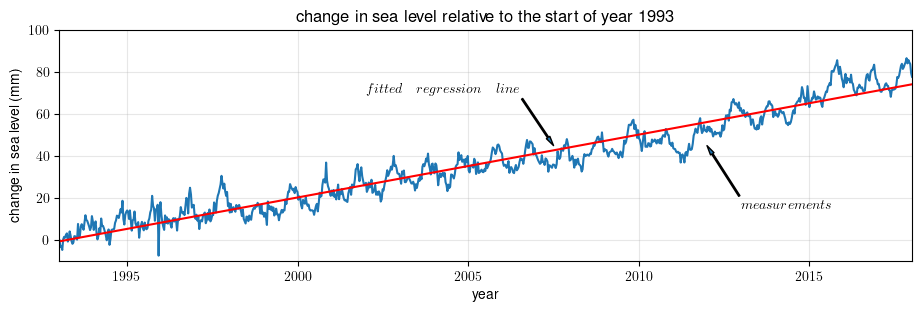

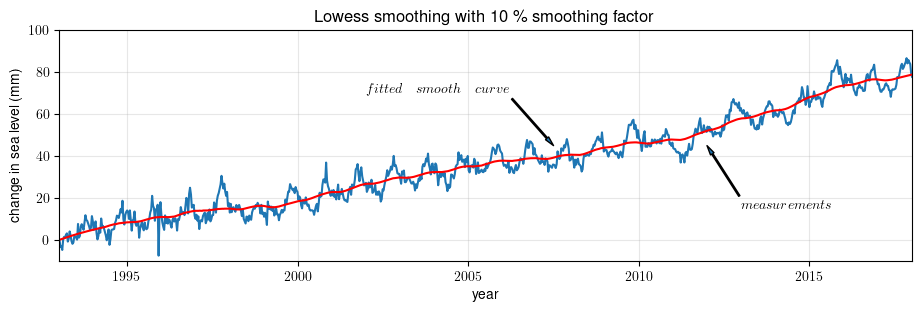

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(11,3))
plt.plot(data['fractional year values'],data['sea level change'])
plt.plot(data['fractional year values'], d_hat,'r')
plt.xlabel('year');
plt.ylabel('change in sea level (mm)');
plt.axis ([1993,2018,-10,100])
plt.title('change in sea level relative to the start of year 1993')
plt.grid(visible = True, alpha =0.3)
plt.annotate('$measurements$',xy=(2012,45),xytext=(2013,15),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$fitted\quad regression\quad line $',xy=(2007.5,45),xytext=(2002,70),arrowprops={"width":1,"headwidth":3,'headlength':7});


plt.figure(figsize=(11,3))
plt.plot(data['fractional year values'],data['sea level change'])
plt.plot(data['fractional year values'], y_hat_LOWESS_1,'r')
plt.xlabel('year');
plt.ylabel('change in sea level (mm)');
plt.axis ([1993,2018,-10,100])
plt.title('Lowess smoothing with 10 \% smoothing factor')
plt.grid(visible = True, alpha =0.3)
plt.annotate('$measurements$',xy=(2012,45),xytext=(2013,15),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$fitted\quad smooth\quad curve$',xy=(2007.5,45),xytext=(2002,70),arrowprops={"width":1,"headwidth":3,'headlength':7});




(Top) Result of fitting a linear regression line onto measurements showing the change in sea level (mm) relative to the start of year 1993. (Bottom) Result of fitting a smoother curve to the same data by using the LOWESS procedure described in Example 50.3. The source of the data used in this simulation is the NASA Goddard Space Flight Center at https://climate.nasa.gov/vital-signs/sea-level/.
 


## figure 50.3

Figure 50.3 shows the LOWESS and LOESS smoothing curves that result from applying the above construction to data measurements representing the change in the global surface temperature (measured in $^{\circ}$C) relative to the average over the period 1951--1980. The data consists of $N=139$ temperature measurements between the years 1880 and 2018. The top figure shows the curve that results from LOWESS smoothing with a smoothing factor of $q=5\%$ (corresponding to windows with $L=6$ samples), while the bottom figure shows the curve that results from LOESS smoothing with a smoothing factor of $q=10\%$ (corresponding to windows with $L=13$ samples). Three repeated runs of the form (50.82) are applied. 

Confidence levels and interpretability

One useful feature of least  squares solutions is that, under reasonable conditions, we can interpret the results and comment on their confidence level. Consider again the standard least-squares problem (50.19) where we denote the entries of $d$  by $\{x(n)\}$ and the rows of $H$ by $\{h_n^T\}$, e.g., $h_n=\mbox{col}\{1,y_n\}$ when augmentation is used. When $H$ is full rank, we know that the least-squares solution is given by 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad w^{\star}=(H^T H)^{-1}H^T d
$

This vector allows us to predict measurements $x(n)$ using the linear regression model

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \widehat{x}(n)=h_n^T w^{\star}
$

There are many ways to assess the quality of the solution in the statistical sciences. We summarize some of the main measures. Using the data $\{x(n)\}$ we define the sample mean and variances:


$\quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \bar{x} = \frac{1}{N}\sum_{n=0}^{N-1} x(n)\\
\quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \sigma_{x}^2 = \frac{1}{N}\sum_{n=0}^{N-1}(x(n)-\bar{x})^2\\
\quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \sigma_{\widehat{x}}^2 = \frac{1}{N}\sum_{n=0}^{N-1}(\widehat{x}(n)-\bar{x})^2\\
\quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \sigma_{\widetilde{x}}^2 = \frac{1}{N}\sum_{n=0}^{N-1}(x(n)-\widehat{x}(n))^2$


The variance $\sigma_x^2$ measures the squared variation of the samples $x(n)$ around their mean, while the variance $\sigma_{\widehat{x}}^2$ measures the squared variation of the predictions around the same mean. The variance $\sigma_{\widetilde{x}}^2$ measures the squared error between the $x(n)$ and their predictions. It is straightforward to verify that the variance of the target signal decouples into the sum (this is related to the earlier expression (50.40)):

$
\quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  \sigma_{x}^2=\sigma_{\widehat{x}}^2+\sigma_{\widetilde{x}}^2
$

The so-called $coefficient$ $of$ $determination$ is defined as the ratio:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad r^2 = \frac{\sigma_{\widehat{x}}^2}{\sigma_x^2}\;=\;1-\frac{\sigma_{\widetilde{x}}^2}{\sigma_{x}^2}\;\in[0,1]
$

This scalar measures the proportion of the variations in  $\{x(n)\}$ that is predictable from (or explained by) the observations  $\{h_n\}$. For example, if $r=0.5$, then this means that $25\%$ of the variations in $\{x(n)\}$ can be explained by the variations in $\{h_n\}$.  This also means that variations around the regression hyperplane account for $75\%$ of the total variations in the  $\{x(n)\}$.
 
We can assess the quality of the estimated least-squares model ${w}^{\star}$ as follows. Assume that the data $\{d,H\}$ satisfy a linear model of the form 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad d=Hw^o+v
$

for some unknown  $w^o\in R^{M}$. The least-squares solution ${w}^{\star}$ given by (50.83) is estimating this model. Assume further that $v$ is Gaussian-distributed with $v\sim{\cal N}_{v}(0,\sigma_{v}^2 I_N)$. Then, it is easily seen that ${w}^{\star}$ is an unbiased estimator since 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad {w}^{\star} = (H^T H)^{-1}H^T d\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad = (H^T H)^{-1}H^T (Hw^o+v)\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad =w^o+(H^T H)^{-1}H^T \,v
$

and, consequently, $E{w}^{\star}=w^o$. Using the fact that $v$ is Gaussian, we conclude that ${w}^{\star}$ is Gaussian-distributed. Its covariance matrix is given by

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad E({w}^{\star}-w^o)({w}^{\star}-w^o)^T =
(H^T H)^{-1}H^T\,(E vv^T)\, H (H^T H)^{-1}\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad =\sigma_{v}^2 (H^T H)^{-1}
$

In summary, we find that 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad  {w}^{\star}\;\sim\;{\cal N}_{{w}^{\star}}\Bigl(w^o, \sigma_{v}^2 (H^T H)^{-1}\Bigr)
$

which means that the individual entries of ${w}^{\star}$ are Gaussian-distributed with variances given by scaled multiples of the diagonal entries of $(H^T H)^{-1}$. That is, for the $j$th entry:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad {w}^{\star}(j)\;\sim\;{\cal N}_{{w}^{\star}(j)}\Bigl(w^o(j),\;\sigma_v^2\Bigl[(H^T H)^{-1}\Bigr]_{jj}\,\Bigr)
$

in terms of the $j$th diagonal entry of $(H^T H)^{-1}$. Using this information, we can now determine a $95\%$ confidence interval for each entry ${w}^o(j)$ as follows.

 
First, we need to introduce the $t-$distribution, also called the Student $t-$distribution. It is symmetric with a similar shape to the Gaussian distribution but has heavier tails. This means that a generic random variable $x$ that is $t-$distributed will have a higher likelihood of assuming extreme values than under a Gaussian distribution. Figure 50.4 compares two Gaussian and $t-$distributions with zero mean and unit variance.

In [ ]:
mat = scipy.io.loadmat('temperature.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}

header = ['1', '2', '3']
with open('temperature.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in mat["A"]:
        writer.writerow(i)
    
example3_data = pd.read_csv("temperature.csv")

N = max(example3_data.shape);
x = example3_data['1'];
y = example3_data['2'];
y_hat_LOWESS = smooth(x,y,0.05,1);
y_hat_LOESS  = smooth(x,y,0.10,0);


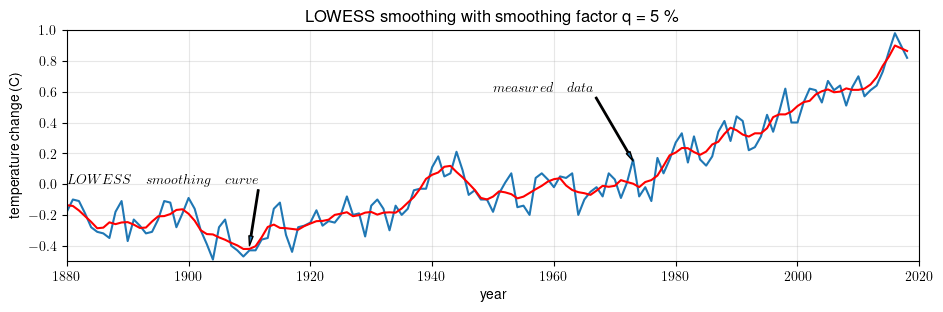

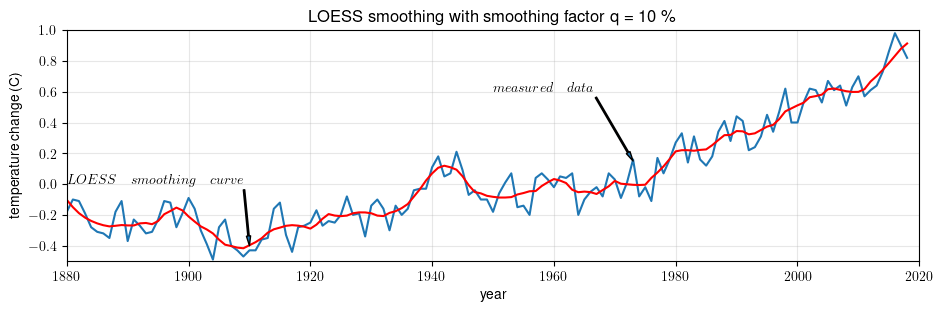

In [16]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(11,3));
plt.plot(example3_data['1'], example3_data['2']);
plt.plot(example3_data['1'], y_hat_LOWESS,'r');
plt.xlabel('year');
plt.ylabel('temperature change (C)');
plt.axis ([1880,2020,-0.5,1]);
plt.title('LOWESS smoothing with smoothing factor q = 5 \%');
plt.grid(visible = True, alpha =0.3);
plt.annotate('$measured\quad data$',xy=(1973,0.15),xytext=(1950,0.6),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$LOWESS\quad smoothing\quad curve$',xy=(1910,-0.4),xytext=(1880,0),arrowprops={"width":1,"headwidth":3,'headlength':7});


plt.figure(figsize=(11,3));
plt.plot(example3_data['1'], example3_data['2']);
plt.plot(example3_data['1'], y_hat_LOESS,'r');
plt.xlabel('year');
plt.ylabel('temperature change (C)');
plt.axis ([1880,2020,-0.5,1]);
plt.title('LOESS smoothing with smoothing factor q = 10 \%');
plt.grid(visible = True, alpha =0.3);
plt.annotate('$measured\quad data$',xy=(1973,0.15),xytext=(1950,0.6),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$LOESS\quad smoothing\quad curve$',xy=(1910,-0.4),xytext=(1880,0),arrowprops={"width":1,"headwidth":3,'headlength':7});



## figure 50.4

The $t-$distribution can be motivated as follows. Consider a collection of $N$ scalar iid  realizations arising from a Gaussian distribution with true mean $\mu$ and variance $\sigma^2$, i.e., $x(n)\sim{\cal N}_{x}(\mu,\sigma^2)$. Introduce the sample mean and (unbiased) variance quantities

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \bar{x} = \frac{1}{N}\sum_{n=1}^N x(n),\;\;\;\;\;s_x^2=\frac{1}{N-1}\sum_{n=1}^{N}(x(n)-\bar{x})^2
$

The quantities $\{\bar{x},s_x^2\}$ should be viewed as random variables, written in boldface notation $\{\bar{x},s_x^2\}$, because their values vary with the randomness in selecting the $\{x(n)\}$. Next, we define the $t-$score variable, which measures how far the sample mean is from the true mean (scaled by the sample standard deviation and $\sqrt{N}$):

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad t = \frac{\bar{x}-\mu}{s_x/\sqrt{N}}
$

The pdf of the $t$ variable is called the $t-$distribution with $d=N-1$ degrees of freedom. It has zero mean and unit variance and is formally defined by the  expression:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad f_{t}(t;d)=\frac{\Gamma((d+1)/2)}{\Gamma(d/2)}\frac{1}{\sqrt{d\pi}}\,\frac{1}{(1+t^2/d)^{(d+1)/2} }
$

where $\Gamma(x)$ refers to the gamma function encountered earlier in Prob. 4.3. The definition (50.94) explains why the $t-$distribution is useful in constructing confidence intervals. That is because it assesses how the sample mean is distributed around the true mean.  
Due to its relevance, the $t-$distribution appears tabulated in many texts on statistics and these tables are used in the following manner.

Let $\alpha=5\%$ (this value is known as the desired ${significance}$ ${level}$ in statistics). We use a table of $t-$distributions to determine the ${critical}$ ${value}$ denoted by  $t_{\alpha/2}^{N-M}$; this is the value in a $t-$distribution with $N-M$ degrees of freedom beyond which the area under the pdf curve will be $2.5\%$ (this calculation amounts to performing what is known as a ${one-tailed}$ ${test}$) --- see Fig. 50.5. An example of this tabular form is shown in Table 50.1. One enters the value of $\alpha/2$ along the vertical direction and the degree $N-M$ along the horizontal direction and  reads out the entry corresponding to $t_{\alpha/2}^{N-M}$. For example, using $N-M=15$ degrees of freedom and $\alpha/2=2.5\%$, one reads the value marked in bold face $t_{2.5\%}^{15}= 2.131$.
 
 

Critical values of $t_{\alpha/2}^{d}$ in one-tailed $t$-tests with $d$ degrees of freedom. The values in the last row can be used for large degrees of freedom.

|  degree d 	|5 %   	|2.5 %   	|1 %   	|0.5 %   	|0.1 %   	|
|---	|---	|---	|---	|---	|---	|
|  1 	|   6.314	|  12.706   	|   31.821   	|   63.657   	|   318.309	|
|  2	|   2.920	|  4.303 	|   6.965	|   9.925	|   22.327	|
|  3 	|   2.353	|  3.182 	|   4.541	|   5.841	|   10.215	|
|  4 	|   2.132	|  2.776 	|   3.747	|   4.604	|   7.173	|
|  5 	|   2.015	|  2.571 	|   3.365	|   4.032	|   5.893	|
|  6 	|   1.943	|  2.447 	|   3.143	|   3.707	|   5.208	|
|  7 	|   1.894	|  2.365 	|   2.998	|   3.499	|   4.785	|
|  8 	|   1.860	|  2.306 	|   2.896	|   3.355	|   4.501	|
|  9 	|   1.833	|  2.262 	|   2.821	|   3.250	|   4.297	|
|  10 	|   1.812	|  2.228 	|   2.764	|   3.169	|   4.144	|
|  11 	|   1.796	|  2.201 	|   2.718	|   3.106	|   4.025	|
|  12 	|   1.782	|  2.179 	|   2.681	|   3.055	|   3.930	|
|  13 	|   1.771	|  2.160 	|   2.650	|   3.012	|   3.852	|
|  14 	|   1.761	|  2.145 	|   2.624	|   2.977	|   3.787	|
|  15 	|   1.753	|  2.131 	|   2.602	|   2.947	|   3.733	|
|  16 	|   1.746	|  2.120 	|   2.583	|   2.921	|   3.686	|
|  17 	|   1.740	|  2.110 	|   2.567	|   2.898	|   3.646	|
|  18 	|   1.734	|  2.101 	|   2.552	|   2.878	|   3.610	|
|  19 	|   1.729	|  2.093 	|   2.539	|   2.861	|   3.579	|
|  20 	|   1.725	|  2.86 	|   2.528	|   2.845	|   3.552	|
|  $\infty$ 	|   1.645 	|   1.960   	|2.326   	|  2.576 	|   3.090   	|
 
Once $t_{\alpha/2}^{N-M}$ is determined, the confidence interval for each entry of $w^o$ would be given by

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad {w}^{\star}(j)\;\pm\; t_{\alpha/2}^{N-M}\,\sigma_v\,\sqrt{[(H^T H)^{-1}]_{jj}}
$

This means that there is a $95\%$ chance that the true value $w^o(j)$ lies within the interval.

In [10]:
x = np.arange(-4, 4, 0.01)
L = max(x.shape)
N = 5
d = N-1 # degrees of freedom
t  = t.pdf(x,df = d)   # t-distribution  
g = []
for n in range(L):
    g.append(1/np.sqrt(2*np.pi))
    g[n] = g[n] * np.exp(-0.5*(x[n]**2))


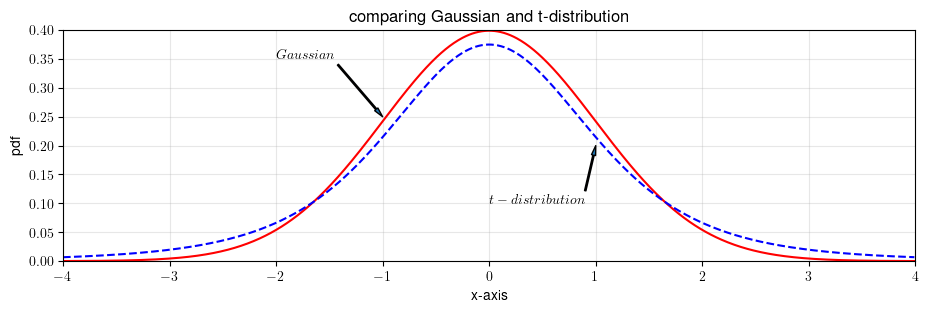

In [11]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(11,3))
plt.plot(x, g, 'r')
plt.plot(x, t,'b', linestyle='dashed')
plt.xlabel('x-axis');
plt.ylabel('pdf');
plt.title('comparing Gaussian and t-distribution')
plt.grid(visible = True, alpha =0.3)
plt.xlim([-4, 4]);
plt.ylim([0, 0.4]);
plt.annotate('$Gaussian$',xy=(-1,0.25),xytext=(-2,0.35),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$t-distribution$',xy=(1,0.2),xytext=(0,0.1),arrowprops={"width":1,"headwidth":3,'headlength':7});



Comparing Gaussian and $t-$distributions with zero mean and unit variance. Observe how the $t-$distribution has higher tails.

## figure 50.5

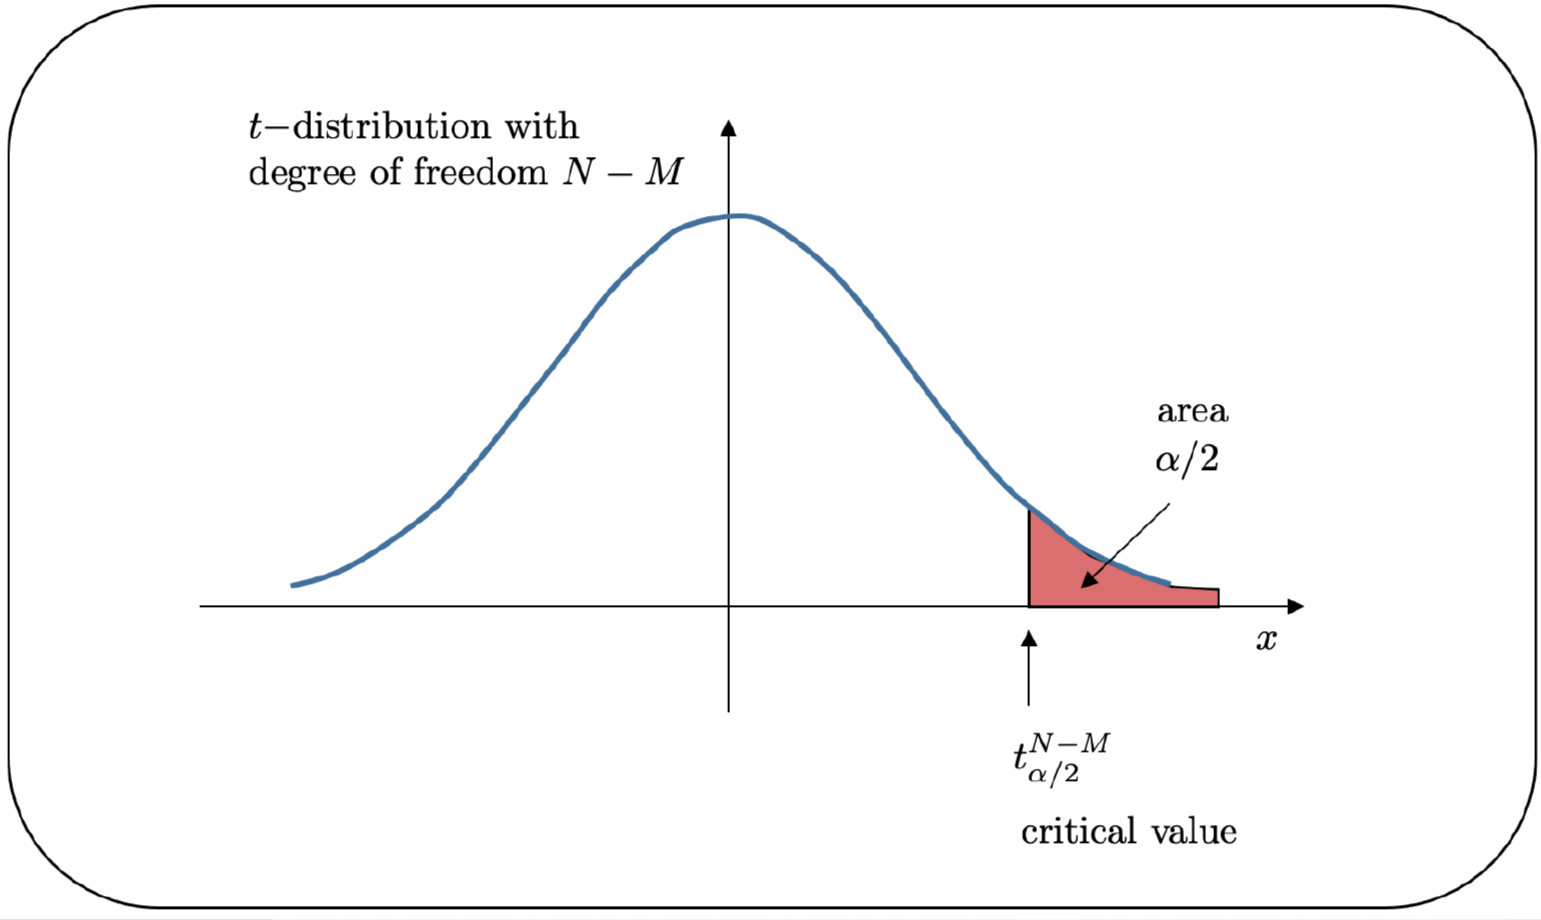
 
The critical value $t_{\alpha/2}^{N-M}$ is the point to the right of which the area under a $t-$distribution with degree $N-M$ is equal to $\alpha/2$.


Likewise, given an observation $h_n$, we can derive a confidence interval for the unperturbed component $h_n^T w^o$, which happens to be the mean of $x(n)$ in  model (50.88). That is, we can derive a confidence interval for the ${expected}$ value of the target signal $x(n)$ that would result from $h_n$. To see this, consider the prediction $\widehat{x}(n)=h_n^T {w}^{\star}$. This prediction is again  Gaussian-distributed since ${w}^{\star}$ is Gaussian. Its mean and variance are found as follows. First note that

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n) = h_n^T\,{w}^{\star}\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad = h_n^T \Bigl\{w^o+(H^T H)^{-1}H^T\,v\Bigr\}\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad = h_n^T w^o + h_n^T (H^T H)^{-1}H^T v
$

We conclude that $E\widehat{x}(n)=h_n^T w^o$, so that the mean of the prediction agrees with the actual mean, $Ex(n)=h_n^T w^o$. Moreover, the prediction variance is given by
 
$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad E(\widehat{x}(n)-h_n^T w^o)^2 = h_n^T (H^T H)^{-1}H^T \,(Evv^T)\, 
H(H^T H)^{-1}h_n\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad = \sigma_{v}^2 h_n^T (H^T H)^{-1} h_n
$

so that 

$$
\widehat{x}(n)\;\sim\;{\cal N}_{\widehat{x}(n)}\Bigl(h_n^T w^o,\;\sigma_{v}^2 h_n^T (H^T H)^{-1} h_n\Bigr)
$$

which shows that the predictions will be Gaussian-distributed around the actual mean, $h_n^T w^o$. We can then determine a $95\%$ confidence interval for the mean value $h_n^T w^o$ by using 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \widehat{x}(n)\;\pm\; t_{\alpha/2}^{N-M}\,\sigma_v\,\sqrt{h_n^T (H^T H)^{-1}h_n}
$

Given an observation $h_n$, this means that there is a $95\%$ chance that the  mean value $h_n^T w^o$  will lie within the above interval around $\widehat{x}(n)$.
 
 
In a similar vein, given a feature $h_n$, we can derive a confidence interval for the target $x(n)$ itself (rather than its mean, as was done above).  To see this, we note  that the difference $\widehat{x}(n)-x(n)$  is again Gaussian-distributed, albeit with mean zero since 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n)-x(n) = \Bigl(h_n^T w^o+h_n^T (H^T H)^{-1}H^T v\Bigr)-
(h_n^T w^o+v(n))\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad = h_n^T (H^T H)^{-1}H^T v-v(n)
$

Moreover, the variance is given by

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad E(\,\widehat{x}(n)-x(n))^2 =
\sigma_{v}^2 (1-h_n^T (H^T H)^{-1} h_n)
$

so that 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \widehat{x}(n)\;\sim\;{\cal N}_{\widehat{x}(n)}\Bigl(x(n),\;\sigma_{v}^2 (1-h_n^T (H^T H)^{-1} h_n)\Bigr)
$

This result shows that the predictions will be Gaussian-distributed around the actual value $x(n)$. We can then determine a $95\%$ confidence interval for  $x(n)$ by using 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{x}(n)\;\pm\; t_{\alpha/2}^{N-M}\,\sigma_v\,\sqrt{1-h_n^T (H^T H)^{-1}h_n}
$

The expressions so far assume knowledge of $\sigma_v^2$. If this information is not available, it can be estimated by noting that $v(n)=x(n)-h_n^T w^o$ and using the sample approximation:

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \widehat{\sigma}_v^2\approx \frac{1}{N-1}\sum_{n=0}^{N-1} \Bigl(x(n)-h_n^T w^{\star}\Bigr)^2
$
 
The analysis in this example is meant to illustrate that, for least-squares problems and under some reasonable conditions, we are able to assess the confidence levels we have in the results. This is a useful property for learning algorithms to have so that their results become amenable to a more judicious interpretation. It also enables the algorithms to detect outliers and malicious data. For example, 
if some data pair $(x(m),h_m)$ is received, one may compute $\widehat{x}(m)=h_m^T w^{\star}$ and verify whether $x(m)$ lies within the corresponding confidence interval (constructed according to (50.104) with $n$ replaced by $m$). If not, then one can flag this data point as being an outlier.
 
We apply construction (50.104)--(50.105) to Example 50.2, which involved fitting a regression line to sea levels over multiple years. We use $N=952$ and $M=2$ (due to the augmentation of the feature data by the unit entry) so that the number of degrees of freedom is 950. Using the data from the last row of Table 50.1 we have 
$t_{2.5\%}^{950}\approx 1.960$. The regression lines that result from using the lower and upper limits in (50.104) appear in dotted format in Fig. 50.6.

## figure 50.6

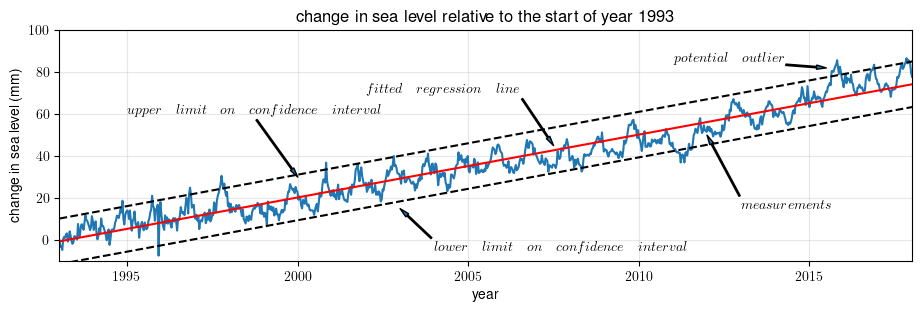

In [13]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(11,3))
plt.plot(data['fractional year values'],data['sea level change'])
plt.plot(data['fractional year values'], d_hat,'r')
line, = plt.plot(data['fractional year values'], d_hat_u,linestyle='dashed')
line.set_color("black")
line, = plt.plot(data['fractional year values'], d_hat_l,linestyle='dashed')
line.set_color("black")
plt.xlabel('year');
plt.ylabel('change in sea level (mm)');
plt.axis ([1993,2018,-10,100])
plt.title('change in sea level relative to the start of year 1993')
plt.grid(visible = True, alpha =0.3)
plt.annotate('$measurements$',xy=(2012,50),xytext=(2013,15),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$fitted\quad regression\quad line $',xy=(2007.5,45),xytext=(2002,70),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$upper\quad limit\quad on\quad confidence\quad interval$',xy=(2000,30),xytext=(1995,60),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$lower\quad limit\quad on\quad confidence\quad interval$',xy=(2003,15),xytext=(2004,-5),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$potential\quad outlier$',xy=(2015.5,82),xytext=(2011,85),arrowprops={"width":1,"headwidth":3,'headlength':7});




The fitted regression line is shown in solid red color, while the lines that correspond to the upper and lower limits of the confidence interval (50.104) appear in dotted format.
